In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Dhaka Rent.xlsx')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df[3:4]

,area,rent
3,2250,36100


In [5]:
df.shape

(60, 2)

Text(0.5, 1.0, 'Dhaka Rent table')

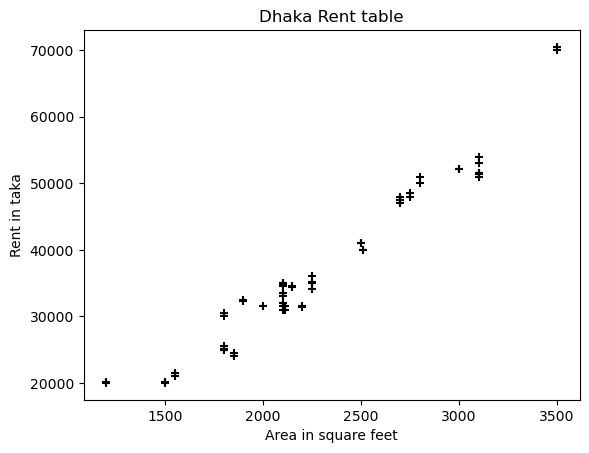

In [6]:
plt.scatter(df.area , df.rent, color='black', marker='+')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in taka')
plt.title('Dhaka Rent table')

In [7]:
x = df.drop('rent', axis=1)
y = df[['rent']]

In [8]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [9]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [10]:
y.shape

(60, 1)

In [11]:
x.mean()

area    2289.0
dtype: float64

In [12]:
y.mean() #

rent    37269.166667
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, test_size=.25) #testing data=25%

In [15]:
train.shape 

(45, 2)

In [16]:
test.shape

(15, 2)

In [17]:
train.head()

,area,rent
48,1800,25500
36,1500,20200
1,2100,35000
39,2100,31500
37,1850,24000


# Seperate

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #testing data=25%

In [19]:
xtrain.head()

,area
43,2510
49,2700
7,1850
14,2250
32,2500


In [20]:
ytrain.head()

,rent
43,40000
49,47500
7,24500
14,34100
32,41100


In [21]:
#df[1:45]

# Linear Regression

In [22]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [25]:
m = lr.coef_
m

array([[20.87611375]])

In [26]:
c = lr.intercept_
c

array([-10452.20563527])

In [27]:
yp = (m*1800)+c
yp

array([[27124.79911315]])

In [28]:
yp = (m*2200)+c
yp

array([[35475.2446128]])

In [29]:
lr.predict([[2200]])

array([[35475.2446128]])

In [30]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [31]:
df['predicted_rent'] = lr.predict(x)
df.head()

,area,rent,predicted_rent
0,2000,31500,31300.021863
1,2100,35000,33387.633238
2,2500,41050,41738.078738
3,2250,36100,36519.050300
4,3000,52100,52176.135612


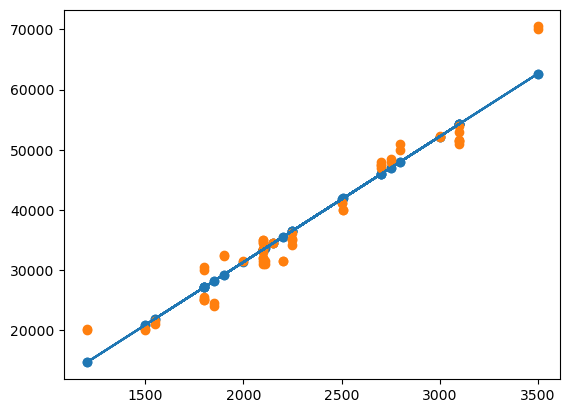

In [32]:
plt.plot(x, df[['predicted_rent']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['predicted_rent']])
plt.scatter(x, df[['rent']])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [35]:
mae

1819.0192225841306

In [36]:
mse

7335043.265951889

In [37]:
lr.score(xtest, ytest)

0.9403542244869332

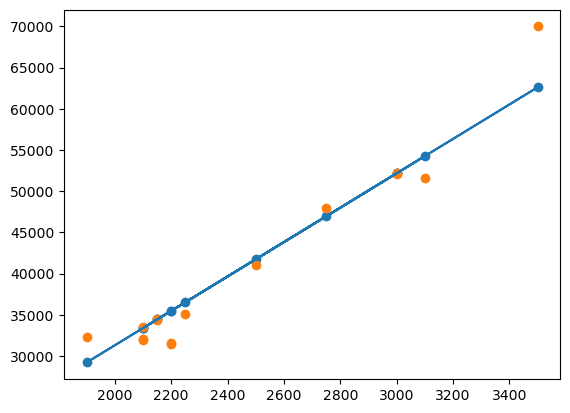

In [38]:
plt.plot(xtest, lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['rent']])
plt.scatter(xtest, ytest)